# ===========================================================
#  STATISTIQUES DESCRIPTIVES COMPLÈTES — SPOTIFY POPULARITY
# ===========================================================

In [ ]:
import pandas as pd
import numpy as np

# -----------------------------------------------------------
#  Chargement du jeu de données
# -----------------------------------------------------------
df = pd.read_csv("train_data_with_genres.csv", sep=";", encoding="utf-8", low_memory=False)

# -----------------------------------------------------------
#  Nettoyage préliminaire
# -----------------------------------------------------------
# Certaines valeurs numériques sont au format texte avec des virgules (ex: "0,75")
#  On remplace les virgules par des points uniquement dans les colonnes de type 'object'
df = df.apply(lambda x: x.astype(str).str.replace(',', '.') if x.dtype == 'object' else x)

# Tentative de conversion automatique en numérique (ignore les erreurs)
df = df.apply(pd.to_numeric, errors='ignore')

# Suppression de la colonne 'row_id' (identifiant inutile pour l'analyse)
df = df.drop(columns=['row_id'])

# -----------------------------------------------------------
#  Encodage des variables booléennes (ex: explicit)
# -----------------------------------------------------------
# Si la colonne "explicit" existe (True/False), on la convertit en 1/0 (float)
if 'explicit' in df.columns:
    df['explicit'] = df['explicit'].replace({'True': 1, 'False': 0}).astype(float)

print(f"[INFO] Dataset chargé : {df.shape[0]} lignes × {df.shape[1]} colonnes\n")

# -----------------------------------------------------------
#  Analyse des types de variables
# -----------------------------------------------------------
# Affiche le nombre de colonnes par type de données (float, int, object, etc.)
print("[TYPES DE VARIABLES]")
print(df.dtypes.value_counts(), "\n")

# Sélectionne uniquement les colonnes numériques (float64 ou int64)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"[INFO] Nombre de variables numériques : {len(num_cols)}")
print(f"[INFO] Exemple : {num_cols[:10]}\n")

# -----------------------------------------------------------
#  Calcul des statistiques descriptives
# -----------------------------------------------------------
# describe() fournit count, mean, std, min, quartiles, max
stats_basic = df.describe().T  # transposé pour une meilleure lisibilité

# Ajoute le pourcentage de valeurs manquantes
stats_basic["missing_%"] = 100 * df.isna().sum() / len(df)

# Calcule la variance pour chaque variable
stats_basic["var"] = df.var()

# Réorganise les colonnes pour plus de clarté
stats_basic = stats_basic[[
    "count", "mean", "std", "min", "25%", "50%", "75%", "max",
    "var", "missing_%"
]]

# -----------------------------------------------------------
#  Filtrage des variables 'one-hot' (track_genre_)
# -----------------------------------------------------------
# On exclut les colonnes d'encodage des genres (trop nombreuses et peu informatives ici)
filtered_stats_basic = stats_basic[~stats_basic.index.str.startswith('track_genre_')]

# -----------------------------------------------------------
#  Affichage du tableau de synthèse
# -----------------------------------------------------------

display(filtered_stats_basic)


C:\Users\Achraf Ktaib\AppData\Local\Temp\ipykernel_41764\3751793780.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


[INFO] Dataset chargé : 85500 lignes × 129 colonnes

[TYPES DE VARIABLES]
int64      119
float64     10
Name: count, dtype: int64 

[INFO] Nombre de variables numériques : 129
[INFO] Exemple : ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness']



,count,mean,std,min,25%,50%,75%,max,var,missing_%
popularity,85500.0,33.184877,22.303252,0.000,17.0000,34.000000,50.0000,100.000,4.974351e+02,0.0
duration_ms,85500.0,228221.164047,105684.995970,8586.000,174029.0000,213061.000000,261962.5000,5237295.000,1.116932e+10,0.0
explicit,85500.0,0.086129,0.280556,0.000,0.0000,0.000000,0.0000,1.000,7.871143e-02,0.0
danceability,85500.0,0.567258,0.173209,0.000,0.4570,0.580000,0.6950,0.985,3.000142e-02,0.0
energy,85500.0,0.641617,0.251390,0.000,0.4730,0.685000,0.8540,1.000,6.319686e-02,0.0
key,85500.0,5.299357,3.557790,0.000,2.0000,5.000000,8.0000,11.000,1.265787e+01,0.0
loudness,85500.0,-8.258863,5.023892,-49.531,-10.0120,-7.009000,-5.0040,4.532,2.523949e+01,0.0
mode,85500.0,0.637836,0.480629,0.000,0.0000,1.000000,1.0000,1.000,2.310039e-01,0.0
speechiness,85500.0,0.084694,0.106209,0.000,0.0359,0.048900,0.0846,0.965,1.128042e-02,0.0
acousticness,85500.0,0.315533,0.332890,0.000,0.0168,0.169000,0.6000,0.996,1.108159e-01,0.0


# ==========================================================
# VISUALISATIONS ESSENTIELLES — PROJET SPOTIFY
# Section 3.2.3 : Visualisations (pour le rapport)
# ==========================================================

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style global des figures
sns.set_theme(style="whitegrid", context="talk")

# Dossier de sortie
os.makedirs("figures", exist_ok=True)

# --- Chargement du dataset ---
df = pd.read_csv("train_data_with_genres.csv", sep=";", encoding="utf-8", low_memory=False)

In [5]:
# --- Conversion robuste vers numérique ---
def force_numeric(frame: pd.DataFrame) -> pd.DataFrame:
    out = frame.copy()
    for c in out.columns:
        if out[c].dtype == "object":
            out[c] = (
                out[c].astype(str)
                .str.replace(",", ".", regex=False)
                .pipe(pd.to_numeric, errors="ignore")
            )
    return out.apply(pd.to_numeric, errors="ignore")

df = force_numeric(df)

# --- Définition de la cible et des variables ---
target = "popularity"
num_cols = [
    "danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms","key","mode","time_signature"
]
num_cols = [c for c in num_cols if c in df.columns]
genre_cols = [c for c in df.columns if c.startswith("track_genre_")]


C:\Users\Achraf Ktaib\AppData\Local\Temp\ipykernel_41764\3489752737.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  .pipe(pd.to_numeric, errors="ignore")
C:\Users\Achraf Ktaib\AppData\Local\Temp\ipykernel_41764\3489752737.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  .pipe(pd.to_numeric, errors="ignore")
C:\Users\Achraf Ktaib\AppData\Local\Temp\ipykernel_41764\3489752737.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  .pipe(pd.to_numeric, errors="ignore")
C:\Users\Achraf Ktaib\AppData\Local\Temp\ipykernel_41764\3489752737.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric with

In [6]:
# --- Conversion robuste vers numérique ---
def force_numeric(frame: pd.DataFrame) -> pd.DataFrame:
    out = frame.copy()
    for c in out.columns:
        if out[c].dtype == "object":
            out[c] = (
                out[c].astype(str)
                .str.replace(",", ".", regex=False)
                .pipe(pd.to_numeric, errors="ignore")
            )
    return out.apply(pd.to_numeric, errors="ignore")

df = force_numeric(df)

# --- Définition de la cible et des variables ---
target = "popularity"
num_cols = [
    "danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms","key","mode","time_signature"
]
num_cols = [c for c in num_cols if c in df.columns]
genre_cols = [c for c in df.columns if c.startswith("track_genre_")]


C:\Users\Achraf Ktaib\AppData\Local\Temp\ipykernel_41764\3489752737.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return out.apply(pd.to_numeric, errors="ignore")


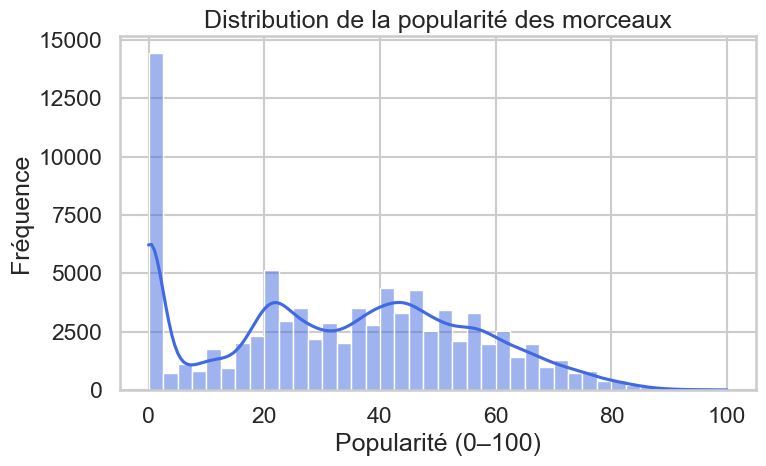

In [ ]:
# --- Histogramme de la popularité ---
plt.figure(figsize=(8,5))
sns.histplot(df[target], bins=40, kde=True, color="royalblue")
plt.title("Distribution de la popularité des morceaux")
plt.xlabel("Popularité (0–100)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.savefig("figures/hist_popularity.png", dpi=300)
plt.show()


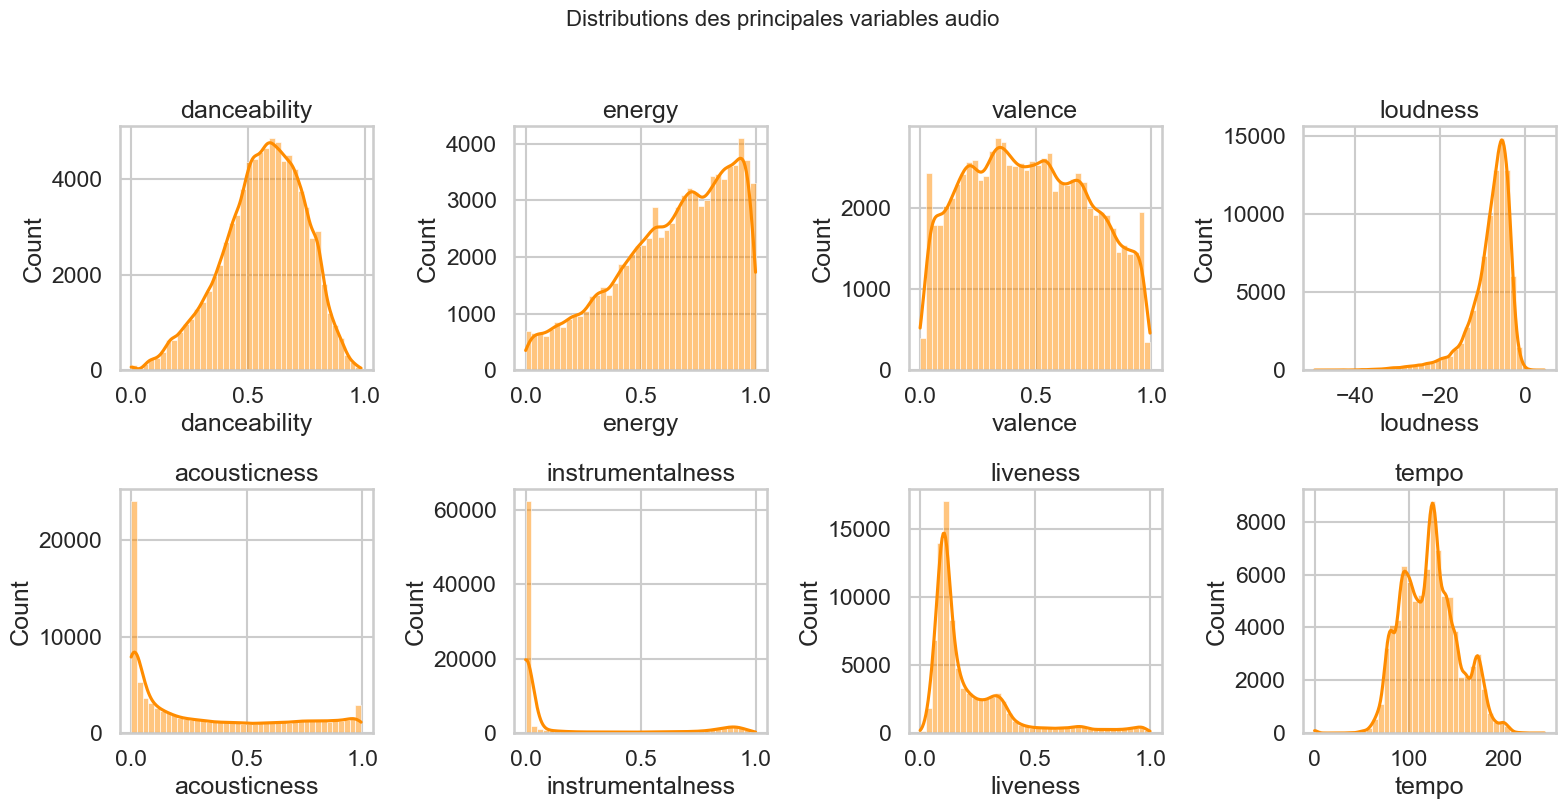

In [ ]:

# --- Distributions des variables audio ---
main_feats = ["danceability","energy","valence","loudness","acousticness",
              "instrumentalness","liveness","tempo"]
main_feats = [c for c in main_feats if c in df.columns]

rows = int(np.ceil(len(main_feats)/4))
fig, axes = plt.subplots(rows, 4, figsize=(16, 4*rows))
axes = axes.flatten()

for i, col in enumerate(main_feats):
    sns.histplot(df[col], bins=40, kde=True, ax=axes[i], color="darkorange")
    axes[i].set_title(col)

for j in range(i+1, rows*4):
    fig.delaxes(axes[j])

fig.suptitle("Distributions des principales variables audio", y=1.02, fontsize=16)
plt.tight_layout()
fig.savefig("figures/hist_audio_features.png", dpi=300)
plt.show()


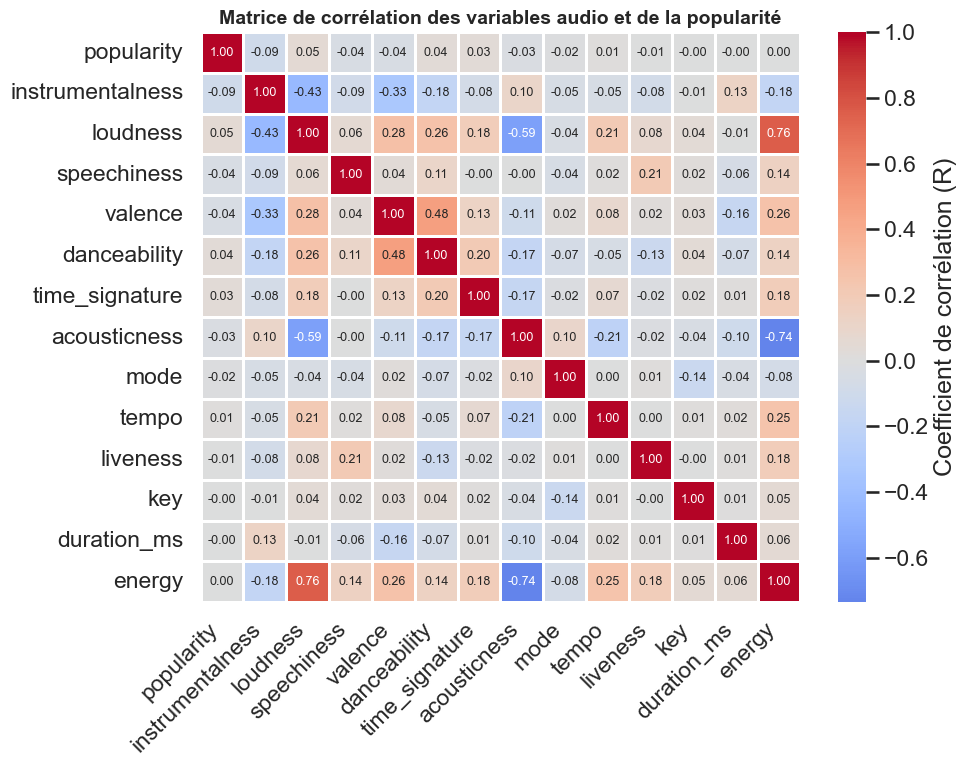

In [12]:

# --- Matrice de corrélation ---
corr_vars = [target] + num_cols
corr_matrix = df[corr_vars].corr(numeric_only=True)

# Trie lignes/colonnes selon l'importance (corrélation absolue avec la cible)
corr_sorted = corr_matrix.reindex(
    index=corr_matrix[target].abs().sort_values(ascending=False).index,
    columns=corr_matrix[target].abs().sort_values(ascending=False).index
)

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_sorted,
    annot=True,                 # affiche les coefficients
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.8,
    cbar_kws={"label": "Coefficient de corrélation (R)"},
    annot_kws={"size": 9}
)
plt.title("Matrice de corrélation des variables audio et de la popularité", fontsize=14, weight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("figures/correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.savefig("figures/correlation_matrix.pdf", bbox_inches="tight")


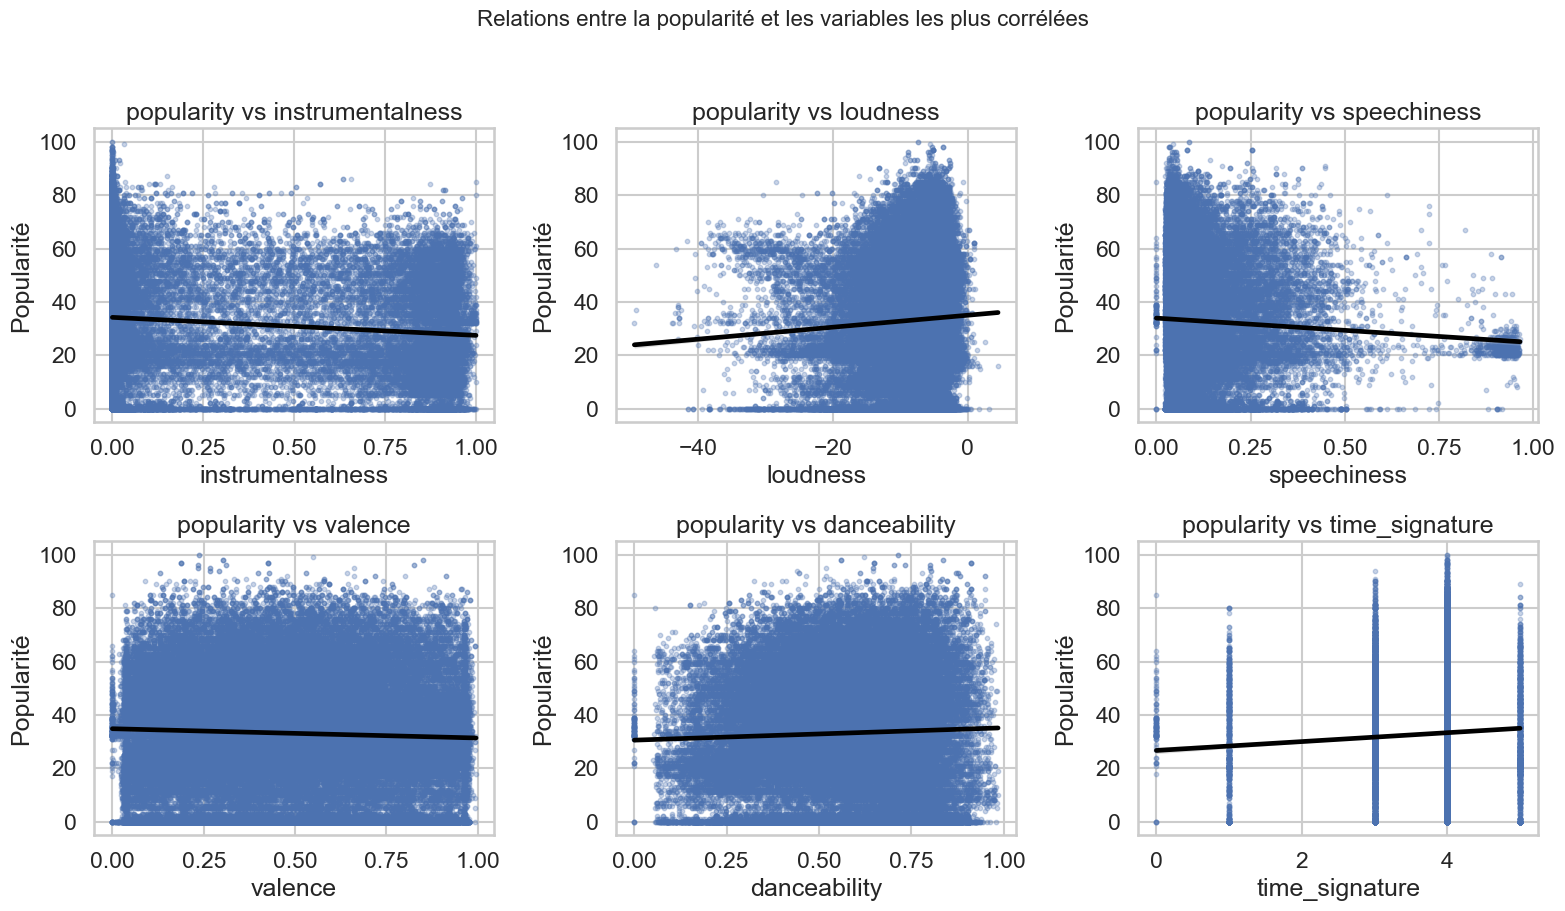

In [10]:

# --- Scatter plots des variables les plus corrélée ---
corr = corr_matrix[target].drop(target).sort_values(key=np.abs, ascending=False)
top6 = corr.index[:6]

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for i, col in enumerate(top6):
    sns.regplot(x=df[col], y=df[target], scatter_kws={"s":10, "alpha":0.3}, line_kws={"color":"black"}, ax=axes[i])
    axes[i].set_title(f"{target} vs {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Popularité")

plt.suptitle("Relations entre la popularité et les variables les plus corrélées", y=1.02, fontsize=16)
plt.tight_layout()
fig.savefig("figures/scatter_vs_popularity.png", dpi=300)
plt.show()


C:\Users\Achraf Ktaib\AppData\Local\Temp\ipykernel_41764\109951274.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["explicit"].astype(int), y=df[target], palette="Set2")


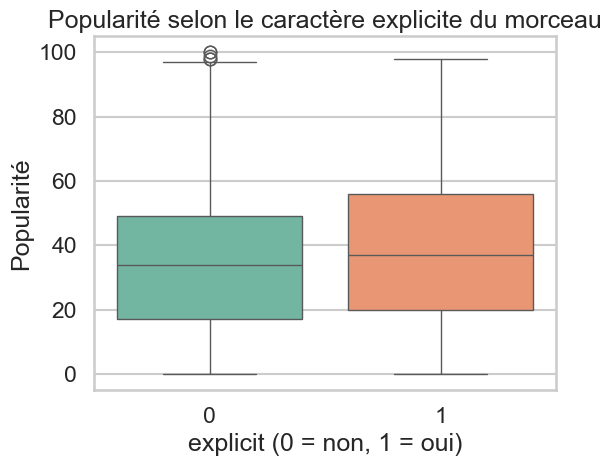

In [13]:

# --- Boxplot explicit vs popularité ---
if "explicit" in df.columns:
    plt.figure(figsize=(6,5))
    sns.boxplot(x=df["explicit"].astype(int), y=df[target], palette="Set2")
    plt.title("Popularité selon le caractère explicite du morceau")
    plt.xlabel("explicit (0 = non, 1 = oui)")
    plt.ylabel("Popularité")
    plt.tight_layout()
    plt.savefig("figures/box_explicit_popularity.png", dpi=300)
    plt.show()


C:\Users\Achraf Ktaib\AppData\Local\Temp\ipykernel_41764\249853660.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


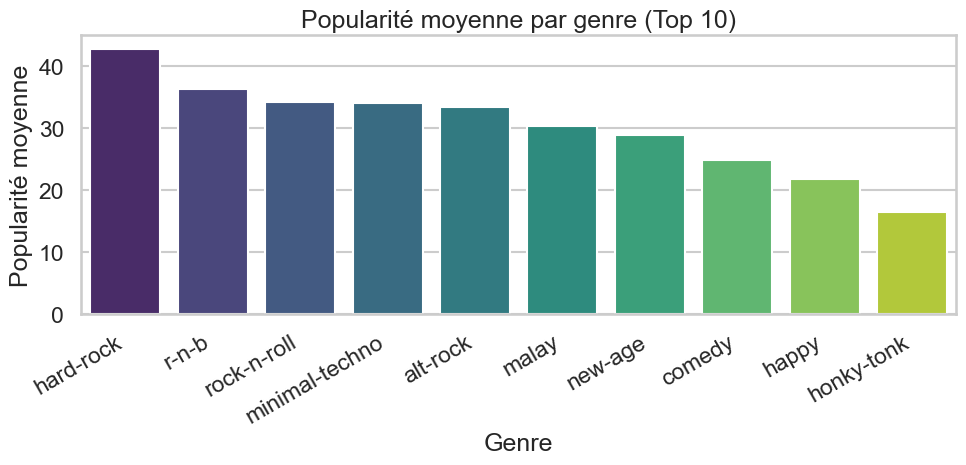

In [14]:
# --- Popularité moyenne par genre ---
if genre_cols:
    genre_matrix = df[genre_cols].astype(float)
    df["_main_genre"] = pd.Index(genre_matrix.columns)[genre_matrix.values.argmax(axis=1)]

    top10_genres = df["_main_genre"].value_counts().head(10).index
    mean_pop = (
        df[df["_main_genre"].isin(top10_genres)]
        .groupby("_main_genre")[target]
        .mean()
        .sort_values(ascending=False)
    )

    plt.figure(figsize=(10,5))
    sns.barplot(
        x=mean_pop.index.str.replace("track_genre_", "", regex=False),
        y=mean_pop.values, palette="viridis"
    )
    plt.xticks(rotation=30, ha="right")
    plt.title("Popularité moyenne par genre (Top 10)")
    plt.xlabel("Genre")
    plt.ylabel("Popularité moyenne")
    plt.tight_layout()
    plt.savefig("figures/bar_mean_pop_by_genre.png", dpi=300)
    plt.show()
# --- Histogramme de la popularité ---


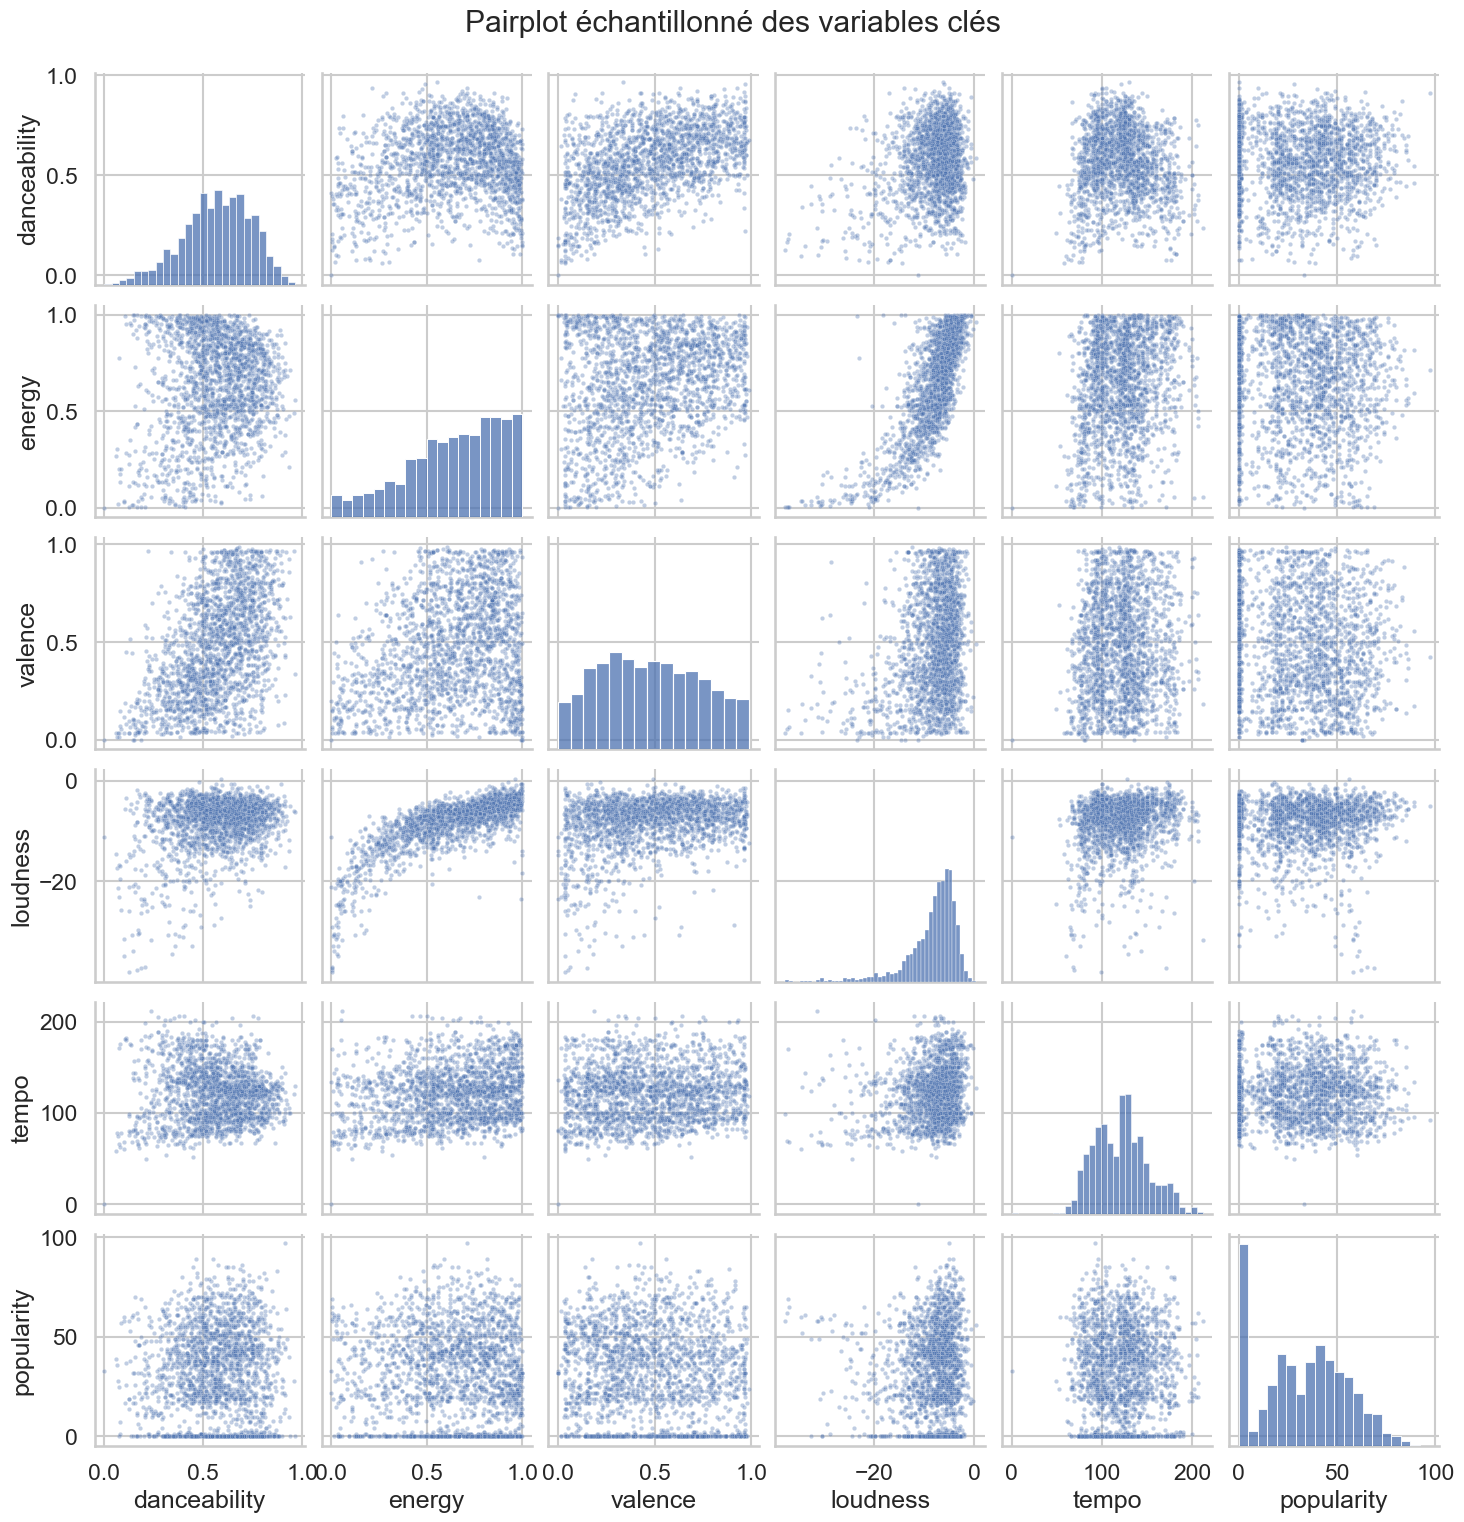

 Toutes les figures ont été enregistrées dans ./figures/


In [15]:
# --- Pairplot échantillonné ---
sample_cols = [c for c in ["danceability","energy","valence","loudness","tempo",target] if c in df.columns]
if len(sample_cols) >= 3:
    sample_df = df[sample_cols].sample(n=min(2000, len(df)), random_state=42)
    g = sns.pairplot(sample_df, diag_kind="hist", plot_kws={"s":10, "alpha":0.35})
    g.fig.suptitle("Pairplot échantillonné des variables clés", y=1.02)
    g.fig.savefig("figures/pairplot_sample.png", dpi=300)
    plt.show()

print(" Toutes les figures ont été enregistrées dans ./figures/")


# ============================================================
# 3.2.3 Analyse en Composantes Principales (ACP)
# ============================================================

[INFO] Nombre de composantes retenues : 7


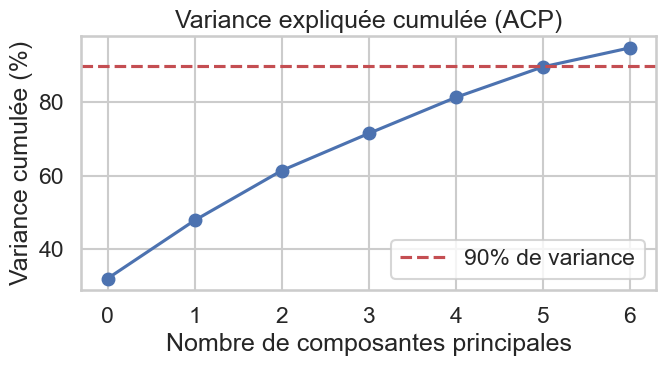

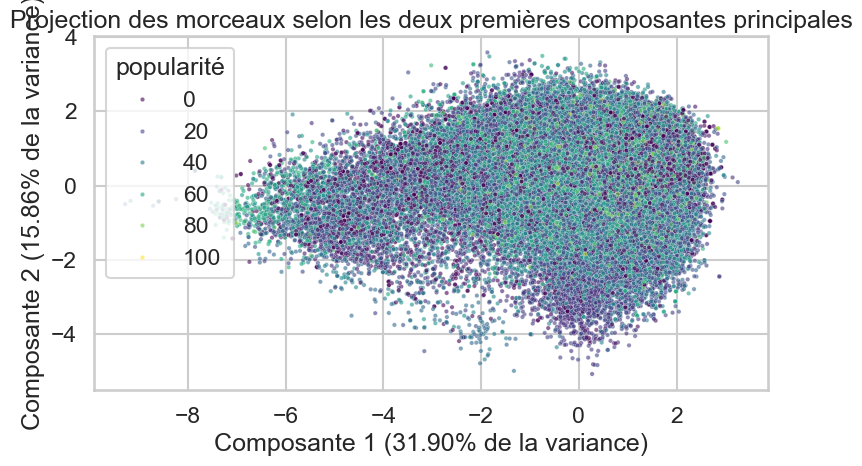

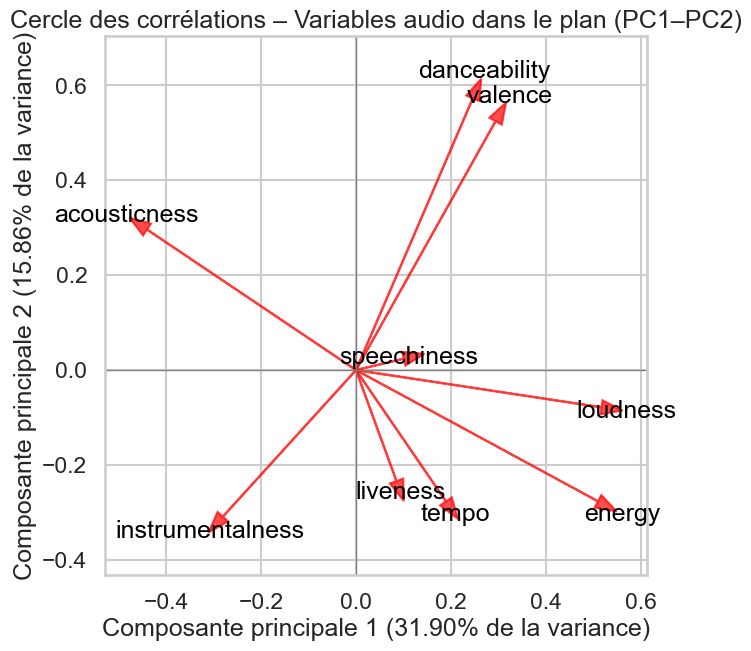

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Variables audio sur lesquelles on applique l'ACP ---
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]

# --- Chargement du dataset d'entraînement ---
df = pd.read_csv("train_data_with_genres.csv", sep=";", encoding="utf-8", low_memory=False)

# --- Remplacement des virgules décimales par des points (format européen -> US) ---
df = df.replace(",", ".", regex=True)

# --- Conversion de ces colonnes audio en numériques + imputation 0 pour NaN résiduels ---
df[audio_features] = df[audio_features].apply(pd.to_numeric, errors='coerce').fillna(0)

# ----------------------------
# 1) STANDARDISATION (centrer-réduire)
# ----------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[audio_features])

# ----------------------------
# 2) ACP avec rétention de 90% de variance
# ----------------------------
# n_components=0.90 => conserve le nb minimal de composantes expliquant 90% de la variance.
pca = PCA(n_components=0.90, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

print(f"[INFO] Nombre de composantes retenues : {pca.n_components_}")

# ----------------------------
# 3) Courbe de variance expliquée cumulée
# ----------------------------
plt.figure(figsize=(7,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100), marker='o')
plt.axhline(90, color='r', linestyle='--', label='90% de variance')
plt.title("Variance expliquée cumulée (ACP)")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance cumulée (%)")
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# 4) Projection des observations sur (PC1, PC2)
# ----------------------------
# Visualisation des morceaux dans le plan des deux premières composantes,
# avec une coloration par la popularité (si la colonne 'popularity' est présente).
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=df['popularity'], palette='viridis', s=10, alpha=0.6
)
plt.title("Projection des morceaux selon les deux premières composantes principales")
plt.xlabel(f"Composante 1 ({pca.explained_variance_ratio_[0]*100:.2f}% de la variance)")
plt.ylabel(f"Composante 2 ({pca.explained_variance_ratio_[1]*100:.2f}% de la variance)")
plt.legend(title="popularité", loc='best')
plt.tight_layout()
plt.show()

# ----------------------------
# 5) Cercle des corrélations (charges sur PC1–PC2)
# ----------------------------

pcs = pd.DataFrame(
    pca.components_.T,
    index=audio_features,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

plt.figure(figsize=(7,7))
# Axes et cercle unité pour le repère du cercle des corrélations
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
circle = plt.Circle((0,0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Flèches des variables depuis l'origine vers (loading PC1, loading PC2)
for feature in audio_features:
    plt.arrow(0, 0,
              pcs.loc[feature, "PC1"],
              pcs.loc[feature, "PC2"],
              color='red', alpha=0.7, head_width=0.03)
    plt.text(pcs.loc[feature, "PC1"]*1.1,
             pcs.loc[feature, "PC2"]*1.1,
             feature, color='black', ha='center', va='center')

plt.title("Cercle des corrélations – Variables audio dans le plan (PC1–PC2)")
plt.xlabel(f"Composante principale 1 ({pca.explained_variance_ratio_[0]*100:.2f}% de la variance)")
plt.ylabel(f"Composante principale 2 ({pca.explained_variance_ratio_[1]*100:.2f}% de la variance)")
plt.axis('equal')  # cercle non déformé
plt.show()
